# St. Gallen Innovation Ecosystem Analysis

This notebook analyzes the innovation ecosystem dataset from START Hack 25 for the Canton of St.Gallen.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

# Set visualization style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [3]:
# Load the dataset
file_path = 'START Hack 25_Canton of St.Gallen_dataset innovation ecosystem.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (65, 7)


,Category,Institution,Name,Description,Focus Areas,Contact,Website
0,Academia,University of St.Gallen (HSG),School of Management (SoM-HSG),Research and teaching in business administrati...,"Business Strategy, Innovation, Leadership",som@unisg.ch,https://som.unisg.ch
1,Academia,University of St.Gallen (HSG),School of Finance (SoF-HSG),"Research on financial markets, banking, corpor...","Banking, Corporate Finance, Risk Management",sof@unisg.ch,https://sof.unisg.ch
2,Academia,University of St.Gallen (HSG),School of Economics and Political Science (SEP...,"Research on economic policy, macroeconomics, a...","Economic Policy, Macroeconomics, International...",seps@unisg.ch,https://seps.unisg.ch
3,Academia,University of St.Gallen (HSG),School of Law (LS-HSG),Legal research and education with a focus on b...,"Business Law, Technology Law, Corporate Law",law@unisg.ch,https://law.unisg.ch
4,Academia,University of St.Gallen (HSG),School of Humanities and Social Sciences (SHSS...,"Interdisciplinary research on society, ethics,...","Ethics, Philosophy, Social Innovation",shss@unisg.ch,https://shss.unisg.ch


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Category       0
Institution    0
Name           0
Description    0
Focus Areas    0
Contact        0
Website        0
dtype: int64


## 1. Distribution of Organizations by Category

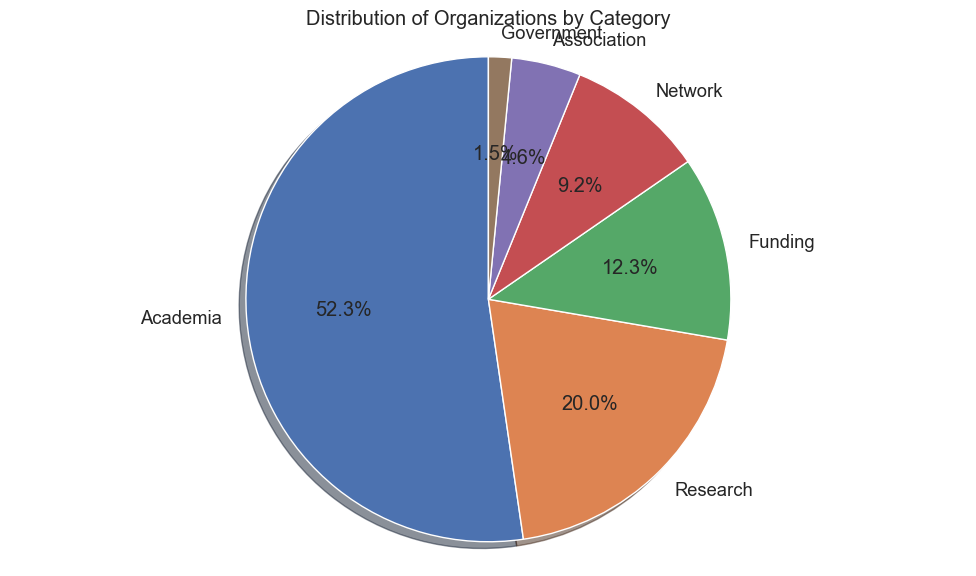

Organization Count by Category:
Academia: 34
Research: 13
Funding: 8
Network: 6
Association: 3
Government: 1


In [5]:
# Count the number of institutions by category
category_counts = df['Category'].value_counts()

# Create a pie chart of categories
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Organizations by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Display counts
print("Organization Count by Category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

## 2. Distribution of Organizations by Institution

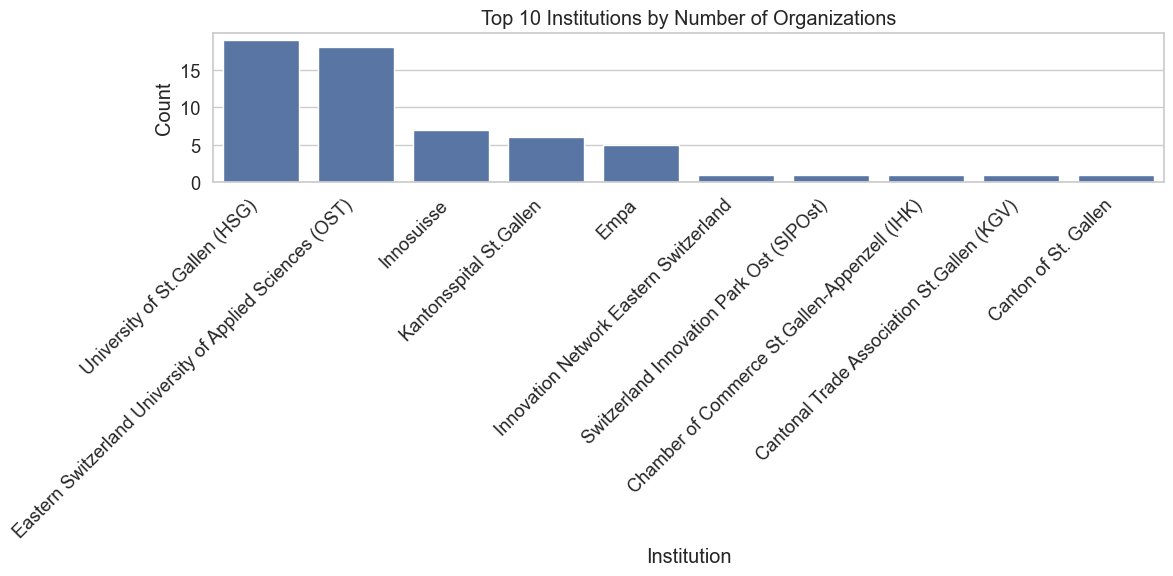

In [6]:
# Count the number of organizations by institution
institution_counts = df['Institution'].value_counts()

# Plot top 10 institutions (if there are many)
top_institutions = institution_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_institutions.index, y=top_institutions.values)
plt.title('Top 10 Institutions by Number of Organizations')
plt.xlabel('Institution')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Analysis of Focus Areas

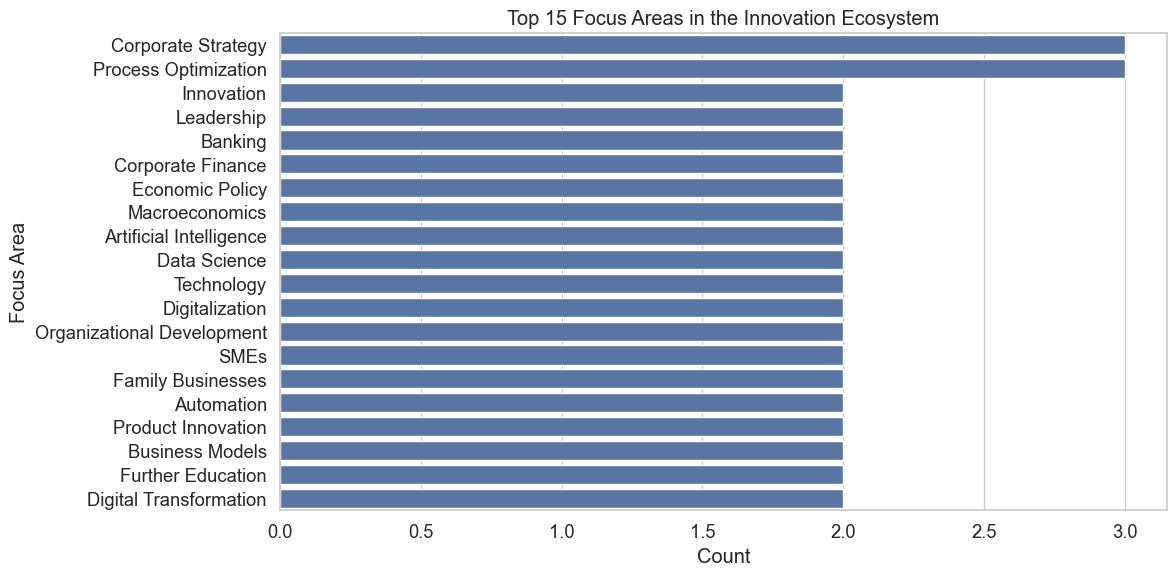

In [7]:
# Extract all focus areas and split them
all_focus_areas = []
for areas in df['Focus Areas']:
    # Split by comma and remove any leading/trailing whitespace
    focus_list = [area.strip() for area in areas.split(',')]
    all_focus_areas.extend(focus_list)

# Count occurrences of each focus area
focus_counts = Counter(all_focus_areas)

# Display top 15 focus areas
top_focus_areas = pd.DataFrame(focus_counts.most_common(20), columns=['Focus Area', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Focus Area', data=top_focus_areas)
plt.title('Top 15 Focus Areas in the Innovation Ecosystem')
plt.xlabel('Count')
plt.ylabel('Focus Area')
plt.tight_layout()
plt.show()

## 4. Focus Areas by Category: What are the main focus areas for each category of organization?

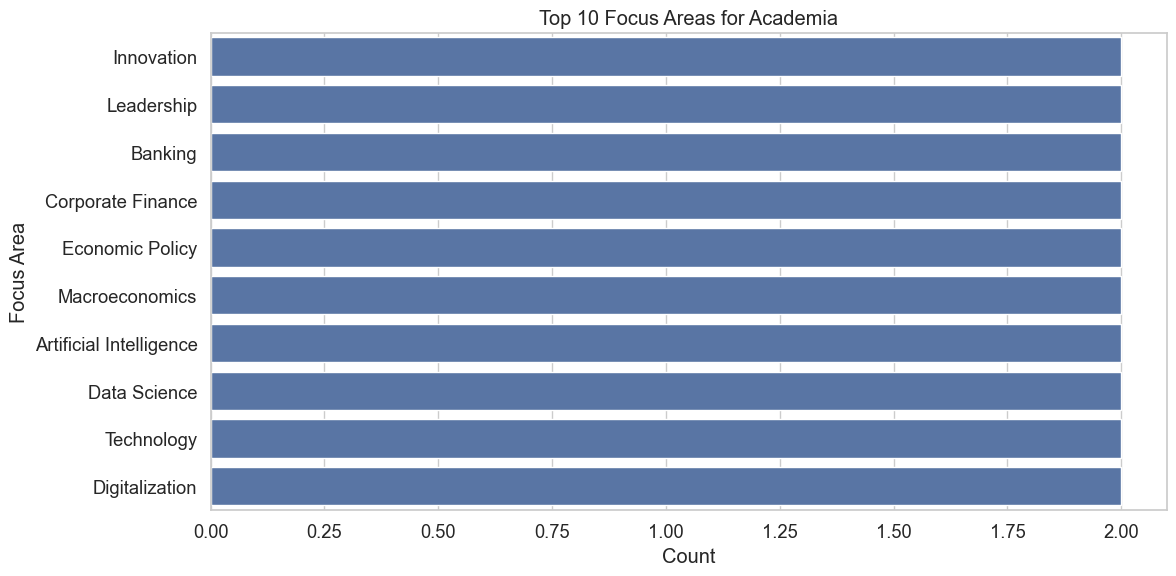

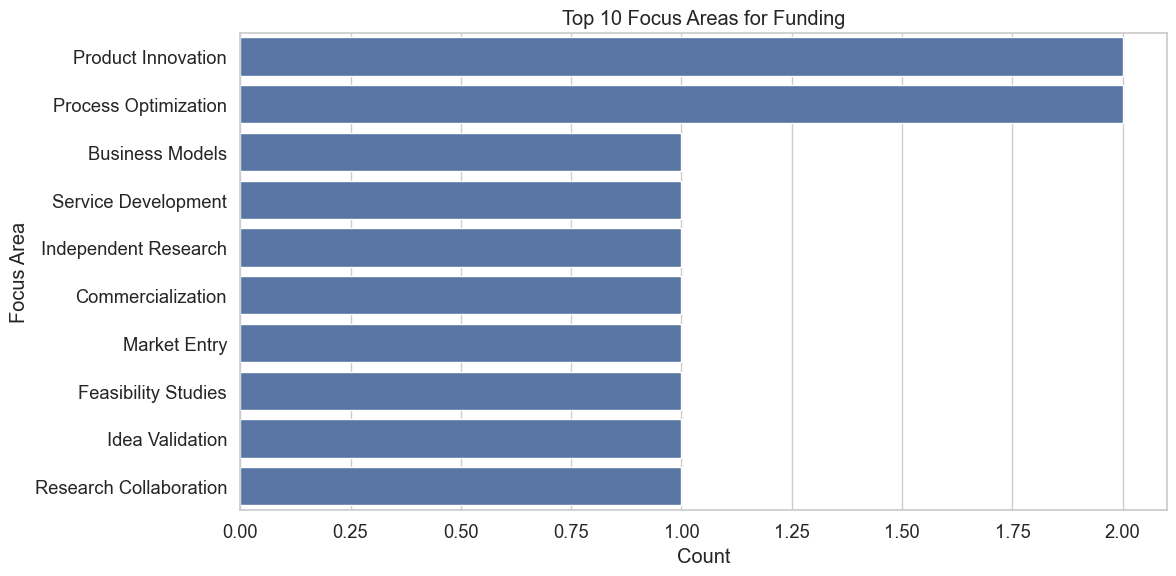

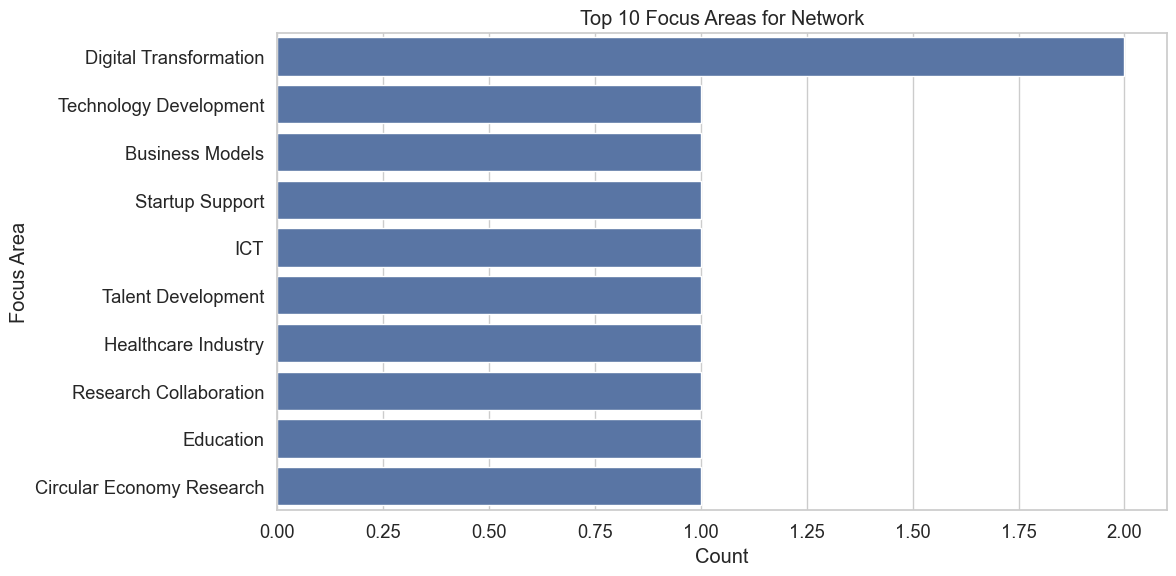

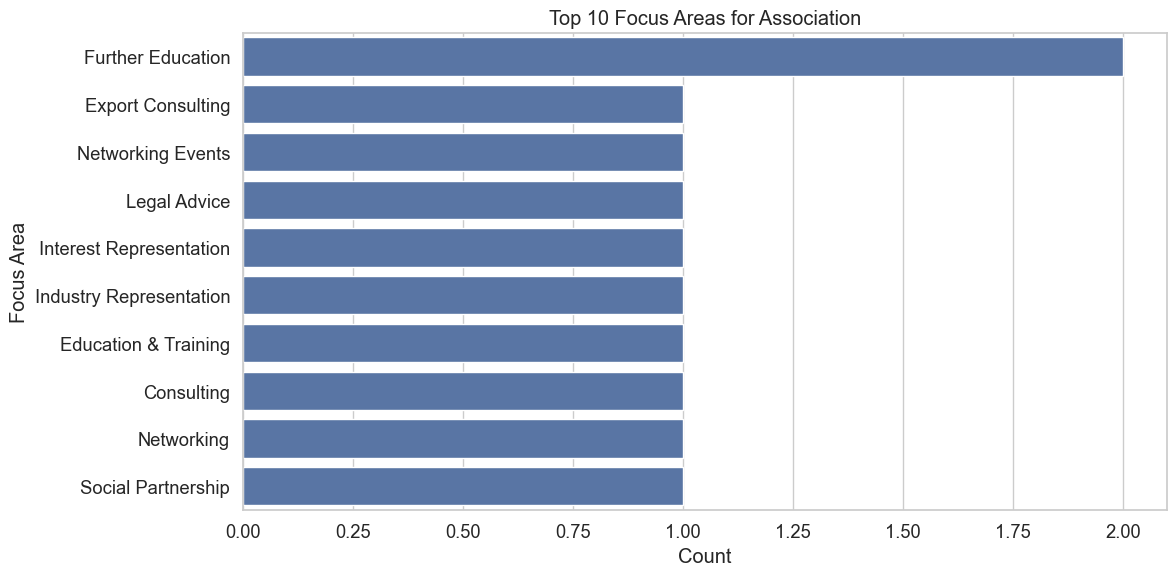

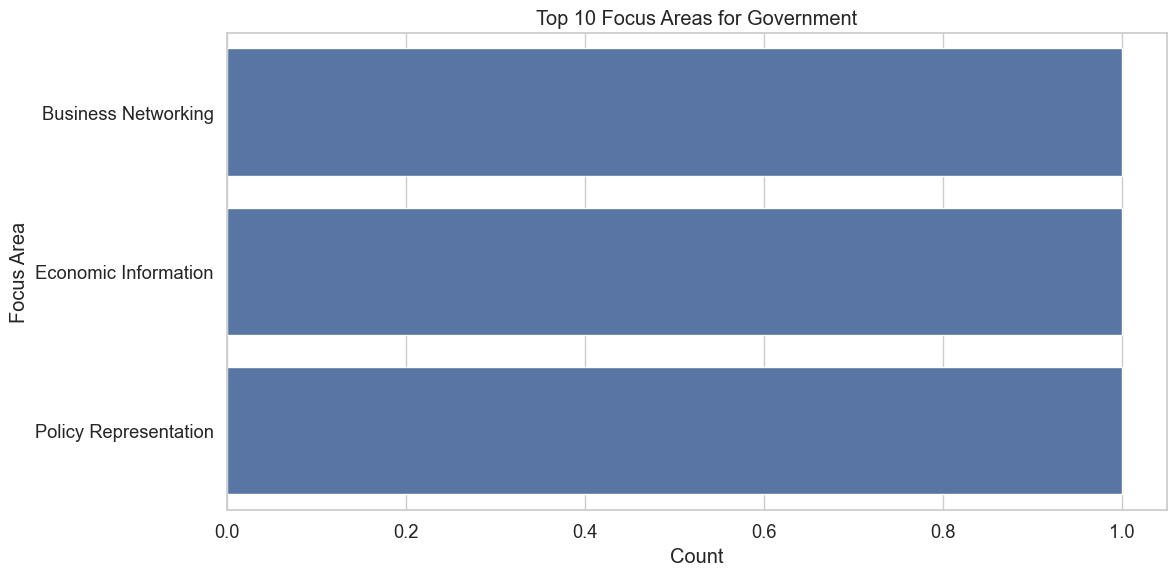

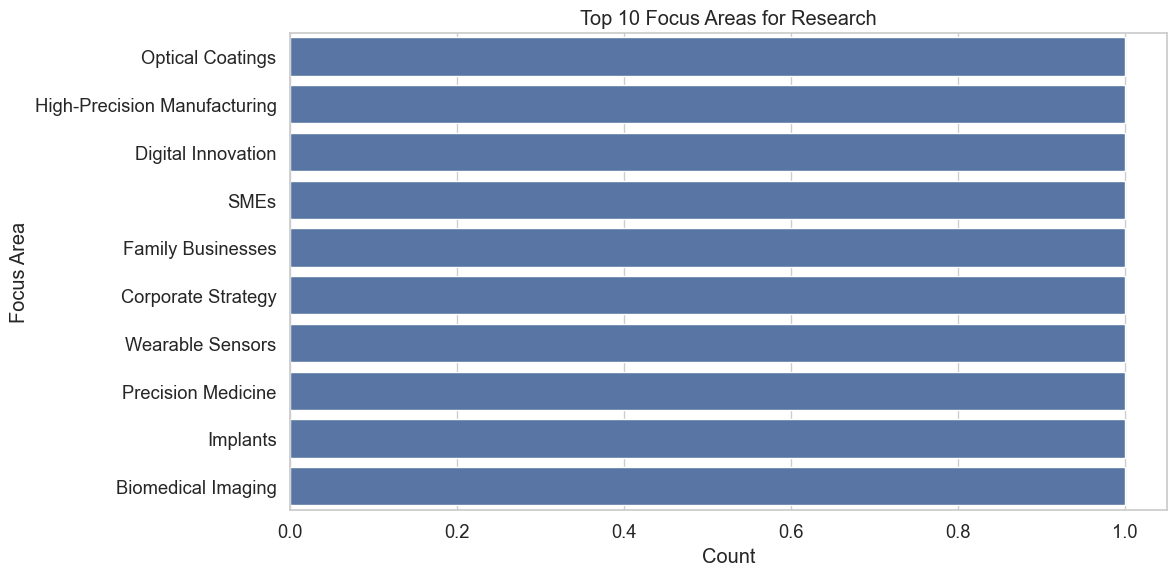

In [8]:
# Create a function to process focus areas by category
def get_focus_areas_by_category(category):
    # Filter dataframe by category
    category_df = df[df['Category'] == category]
    
    # Extract all focus areas for this category
    category_focus_areas = []
    for areas in category_df['Focus Areas']:
        focus_list = [area.strip() for area in areas.split(',')]
        category_focus_areas.extend(focus_list)
    
    # Count occurrences
    return Counter(category_focus_areas)

# Get unique categories
categories = df['Category'].unique()

# Plot top focus areas for each category
for category in categories:
    focus_counts = get_focus_areas_by_category(category)
    
    # Get top 10 focus areas for this category
    top_focus = pd.DataFrame(focus_counts.most_common(10), columns=['Focus Area', 'Count'])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Focus Area', data=top_focus)
    plt.title(f'Top 10 Focus Areas for {category}')
    plt.xlabel('Count')
    plt.ylabel('Focus Area')
    plt.tight_layout()
    plt.show()

## 5. Network Analysis: Connections between institutions

In [9]:
# Identify connections based on shared focus areas
def create_focus_area_dict():
    # Create a dictionary mapping focus areas to institutions
    focus_to_inst = {}
    
    for i, row in df.iterrows():
        institution = row['Institution']
        focus_areas = [area.strip() for area in row['Focus Areas'].split(',')]
        
        for area in focus_areas:
            if area not in focus_to_inst:
                focus_to_inst[area] = []
            focus_to_inst[area].append(institution)
    
    return focus_to_inst

# Create a dictionary of focus areas to institutions
focus_to_inst = create_focus_area_dict()

# Create a connections matrix between institutions
unique_institutions = df['Institution'].unique()
connections = pd.DataFrame(0, index=unique_institutions, columns=unique_institutions)

# Count shared focus areas as connections
for focus_area, institutions in focus_to_inst.items():
    for i in range(len(institutions)):
        for j in range(i+1, len(institutions)):
            inst1 = institutions[i]
            inst2 = institutions[j]
            connections.loc[inst1, inst2] += 1
            connections.loc[inst2, inst1] += 1  # Symmetric matrix

# Display the top 5 most connected institution pairs
connection_pairs = []

for i in range(len(unique_institutions)):
    for j in range(i+1, len(unique_institutions)):
        inst1 = unique_institutions[i]
        inst2 = unique_institutions[j]
        connection_strength = connections.loc[inst1, inst2]
        if connection_strength > 0:
            connection_pairs.append((inst1, inst2, connection_strength))

# Sort by connection strength
connection_pairs.sort(key=lambda x: x[2], reverse=True)

print("Top 5 Most Connected Institution Pairs (based on shared focus areas):")
for inst1, inst2, strength in connection_pairs[:5]:
    print(f"{inst1} <-> {inst2}: {strength} shared focus areas")

Top 5 Most Connected Institution Pairs (based on shared focus areas):
University of St.Gallen (HSG) <-> Eastern Switzerland University of Applied Sciences (OST): 6 shared focus areas
Innovation Network Eastern Switzerland <-> Innosuisse: 2 shared focus areas
Eastern Switzerland University of Applied Sciences (OST) <-> Innovation Network Eastern Switzerland: 1 shared focus areas
Eastern Switzerland University of Applied Sciences (OST) <-> Innosuisse: 1 shared focus areas
Innovation Network Eastern Switzerland <-> Switzerland Innovation Park Ost (SIPOst): 1 shared focus areas


## 6. Geographic Analysis

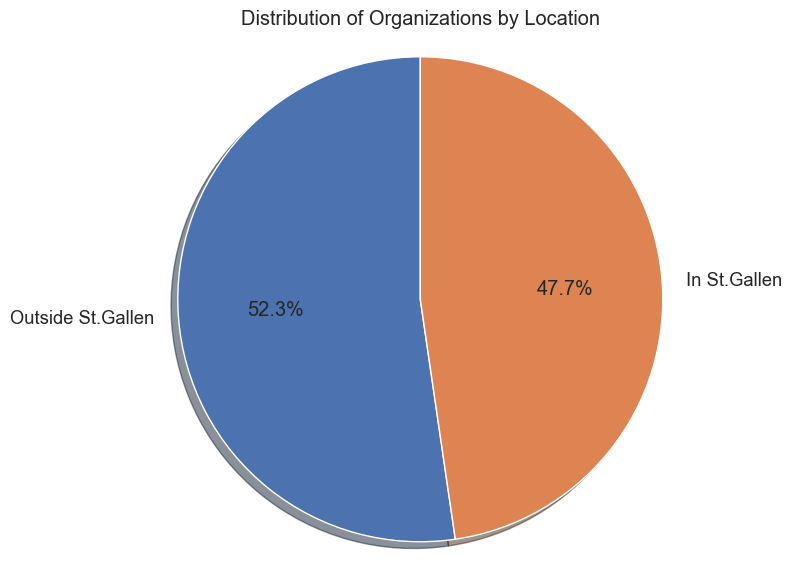

In [10]:
# Since we don't have explicit geographic data, we'll make some inferences
# Let's create a simple "in St. Gallen" flag as an example

def is_in_st_gallen(institution):
    return 'St.Gallen' in institution or 'St. Gallen' in institution

# Apply the function to create a new column
df['In St.Gallen'] = df['Institution'].apply(is_in_st_gallen)

# Count organizations by location
location_counts = df['In St.Gallen'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=['Outside St.Gallen', 'In St.Gallen'] if False in location_counts.index else ['In St.Gallen'], 
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Organizations by Location')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 7. Website Analysis - Domain Extensions

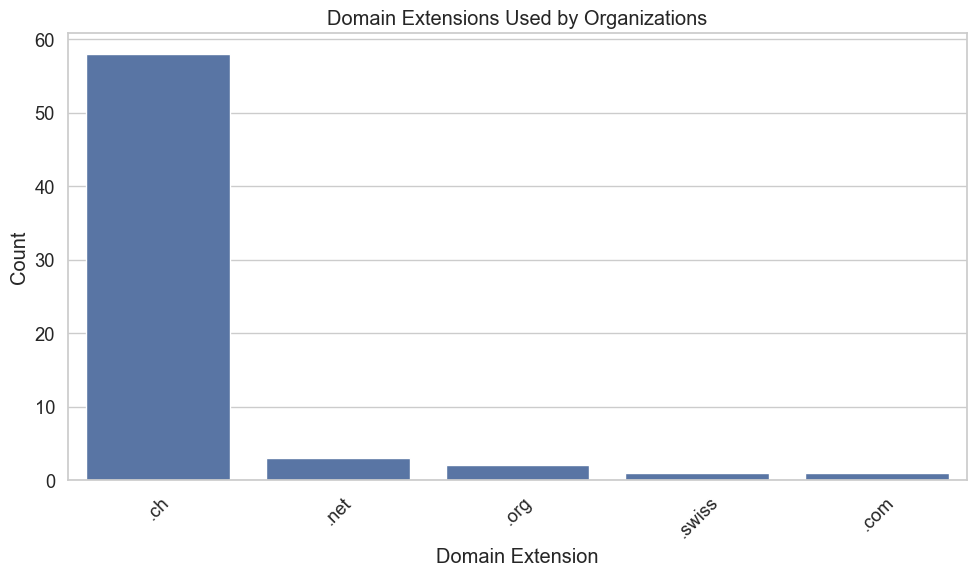

In [11]:
# Extract domain extensions from website URLs
def extract_extension(url):
    if pd.isna(url):
        return 'Unknown'
    
    # Extract the domain extension using regex
    match = re.search(r'\.(\w+)(?:$|/)', url)
    if match:
        return '.' + match.group(1)
    else:
        return 'Unknown'

# Apply the function to create a new column
df['Domain Extension'] = df['Website'].apply(extract_extension)

# Count organizations by domain extension
extension_counts = df['Domain Extension'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=extension_counts.index, y=extension_counts.values)
plt.title('Domain Extensions Used by Organizations')
plt.xlabel('Domain Extension')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Innovation Ecosystem Summary

In [12]:
# Create a summary of the innovation ecosystem
summary = {
    'Total Organizations': len(df),
    'Categories': len(df['Category'].unique()),
    'Institutions': len(df['Institution'].unique()),
    'Unique Focus Areas': len(set(all_focus_areas)),
    'Top Category': df['Category'].value_counts().index[0],
    'Top Institution': df['Institution'].value_counts().index[0],
    'Top Focus Area': focus_counts.most_common(1)[0][0]
}

# Display the summary
for key, value in summary.items():
    print(f"{key}: {value}")

Total Organizations: 65
Categories: 6
Institutions: 15
Unique Focus Areas: 177
Top Category: Academia
Top Institution: University of St.Gallen (HSG)
Top Focus Area: Optical Coatings


## 9. Recommendations for Innovation Ecosystem Enhancement

Based on the analysis of the St. Gallen innovation ecosystem dataset, here are some recommendations for enhancement:

1. **Fill Focus Area Gaps**: Identify underrepresented focus areas and encourage new organizations or expansions to address these gaps.

2. **Strengthen Connections**: Create more networking opportunities between organizations with complementary focus areas.

3. **Balance Categories**: If certain categories are underrepresented (e.g., Funding, Network), consider initiatives to increase their presence.

4. **Geographical Expansion**: Evaluate if the innovation ecosystem is too concentrated in St. Gallen city and consider expansion to other areas within the canton.

5. **Industry-Academia Collaboration**: Foster more partnerships between academic institutions and industry/funding organizations to accelerate innovation commercialization.

6. **Digitalization Focus**: Given the importance of digitalization across sectors, ensure adequate resources and support for digital transformation initiatives.